# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.columns.tolist()


['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'cal

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Data Set Chosen:
I chose the Airbnb NYC listings data set.

2. What will you be predicting? What is the label?
I will be predicting whether a listing will receive a high review score.
The label is a new column I created called high_rating, which is 1 if the review score is 4.5 or higher (high rating), and 0 otherwise. This stems from the review_scores_rating column.

3. Type of Problem:
This is a supervised learning problem because we are using past data with labels to train the model.
It is a classification problem, specifically a binary classification problem because there are only two possible outcomes: high rating 1 or not (0).

4. Features:
Some features I plan to use are:

price,

availability_365,

host_is_superhost,

host_response_rate, host_acceptance_rate,

number_of_reviews,

reviews_per_month,

neighbourhood_group_cleansed


5. Why this is an important problem:
This problem is important because Airbnb wants guests to have great experiences. A model that can predict which listings are likely to get high reviews can help Airbnb:

Show the best listings at the top of search results.

Help hosts improve their listings by showing them what features matter most.

This creates value by improving customer satisfaction, increasing bookings, and building trust in the platform.



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
missing_counts = df.isnull().sum()

missing_counts[missing_counts > 0]

name                         5
description                570
neighborhood_overview     9816
host_location               60
host_about               10945
host_response_rate       11843
host_acceptance_rate     11113
bedrooms                  2918
beds                      1354
dtype: int64

In [4]:
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())

In [5]:
print(df['host_response_rate'].isnull().sum())   #this is to double check that all the nulls are gone
print(df['host_acceptance_rate'].isnull().sum())

0
0


In [6]:
# Create binary label 'high_rating'
df = df[df['review_scores_rating'].notnull()]
df['high_rating'] = (df['review_scores_rating'] >= 4.5).astype(int)

In [7]:
feature_list = [
    'price',
    'availability_365',
    'host_is_superhost',
    'host_response_rate',
    'host_acceptance_rate',
    'reviews_per_month',
    'number_of_reviews',
    'calculated_host_listings_count',
    'instant_bookable',
    'room_type',
    'bathrooms',
    'neighbourhood_group_cleansed'
]


In [8]:
# drop unwanted columns
cols_to_drop = [col for col in df.columns if col not in feature_list + ['high_rating']]
df = df.drop(columns=cols_to_drop)

print(df.columns.tolist())  # confirm

['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'bathrooms', 'price', 'availability_365', 'number_of_reviews', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'high_rating']


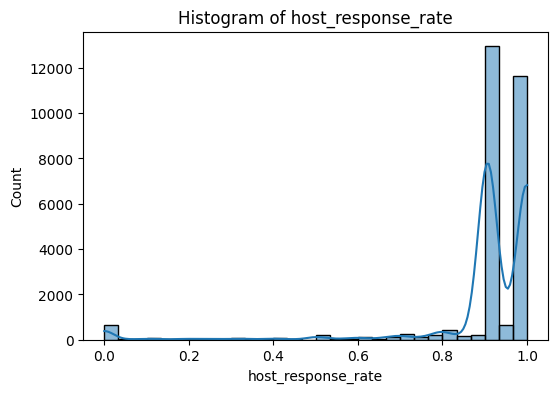

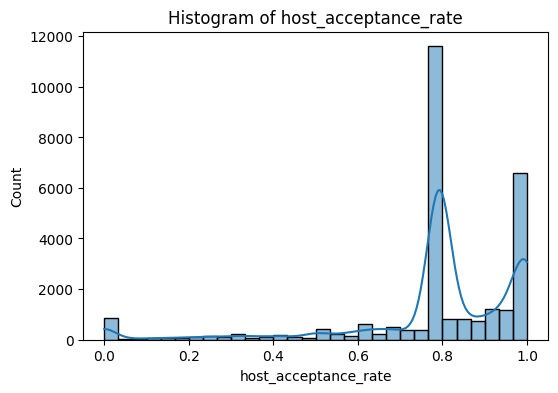

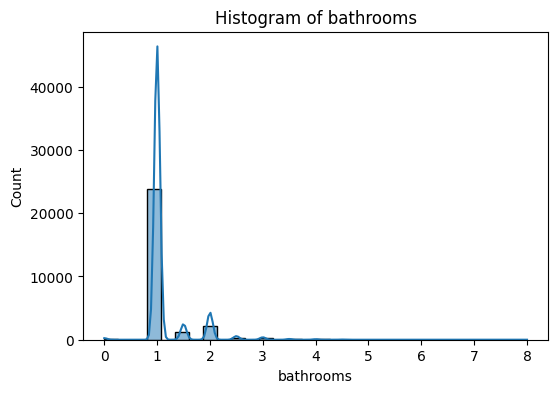

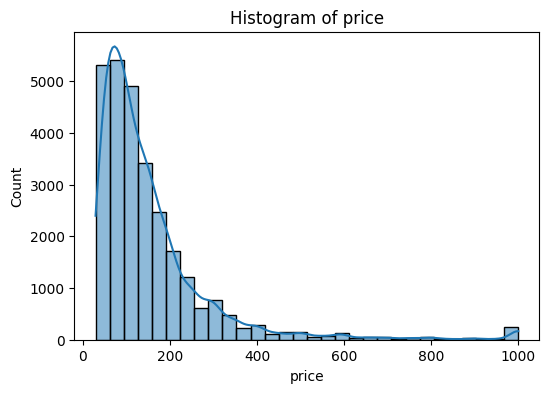

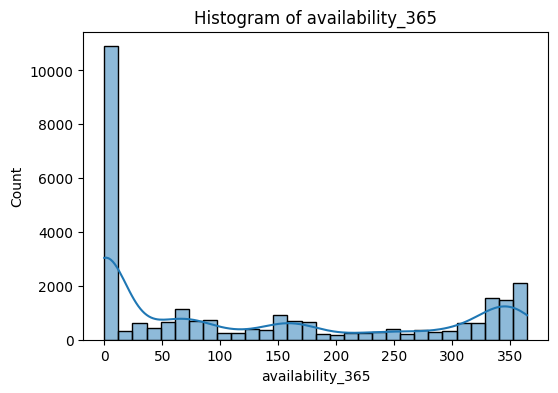

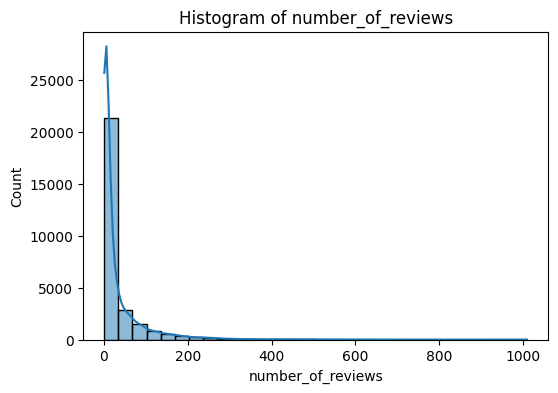

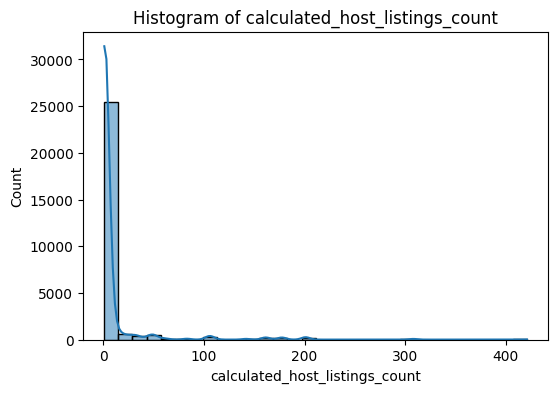

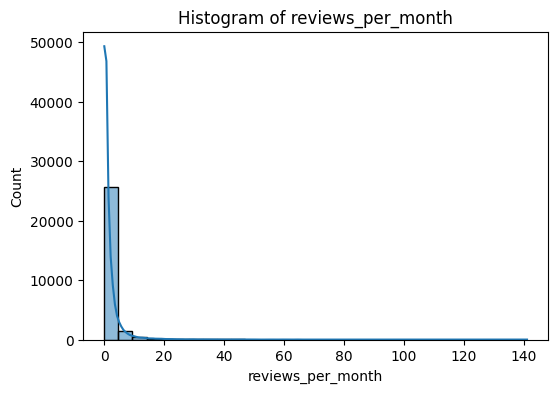

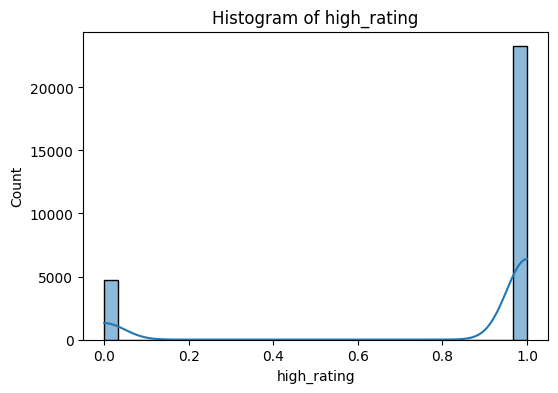

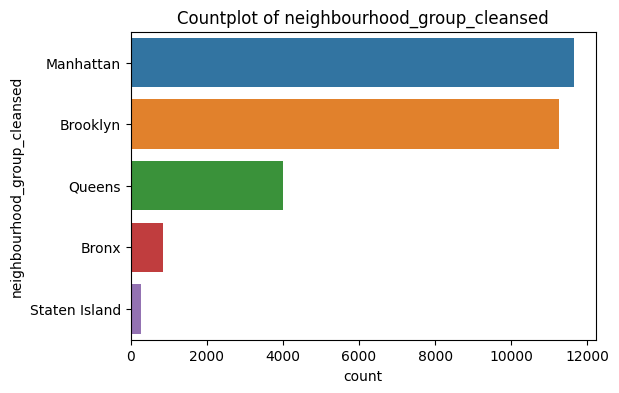

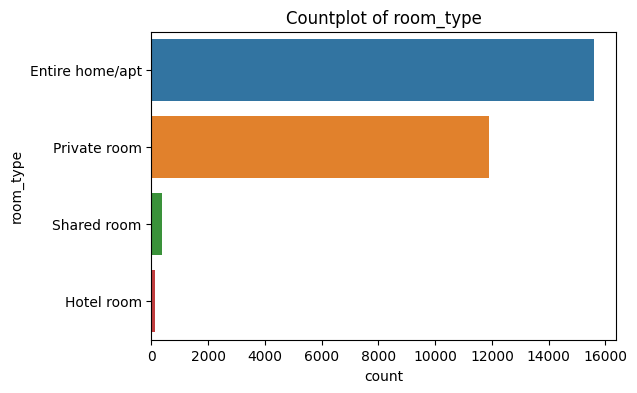

In [9]:
# numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

In [10]:
skewness = df[num_cols].skew().sort_values(ascending=False)
print(skewness)

reviews_per_month                 10.504073
calculated_host_listings_count     5.621544
number_of_reviews                  3.791892
bathrooms                          3.786899
price                              3.198243
availability_365                   0.558829
high_rating                       -1.758726
host_acceptance_rate              -2.043946
host_response_rate                -4.026905
dtype: float64


In [11]:
def winsorize_series(s, lower_quantile=0.01, upper_quantile=0.99):
    lower = s.quantile(lower_quantile)
    upper = s.quantile(upper_quantile)
    return s.clip(lower=lower, upper=upper)

#high_rating is binary label so did not include
features_to_winsorize = [
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'number_of_reviews', 
    'bathrooms', 
    'price',
    'host_response_rate', 
    'host_acceptance_rate'
]


for feature in features_to_winsorize:
    df[feature] = winsorize_series(df[feature])

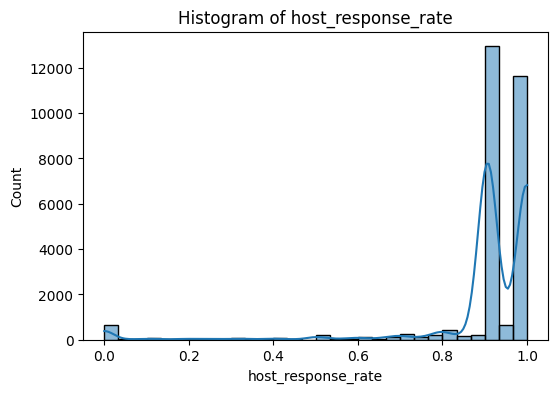

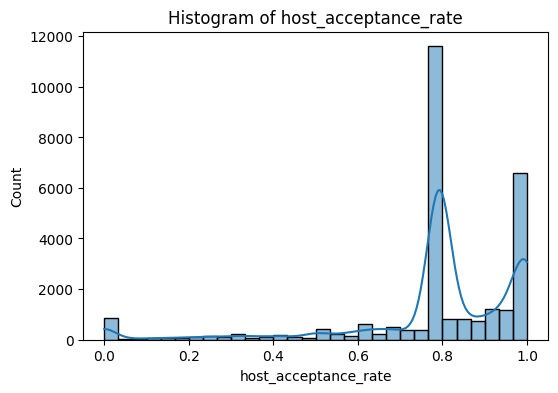

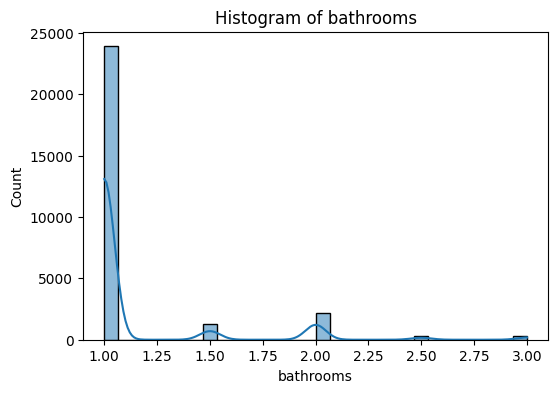

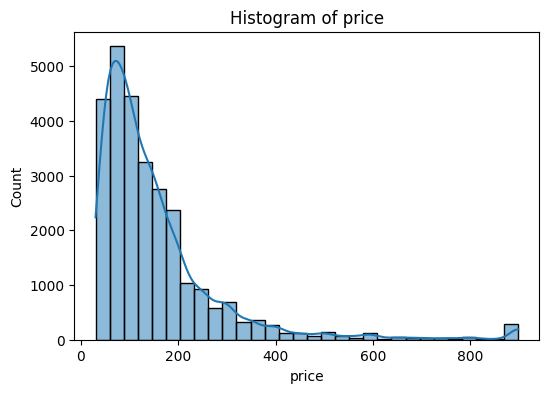

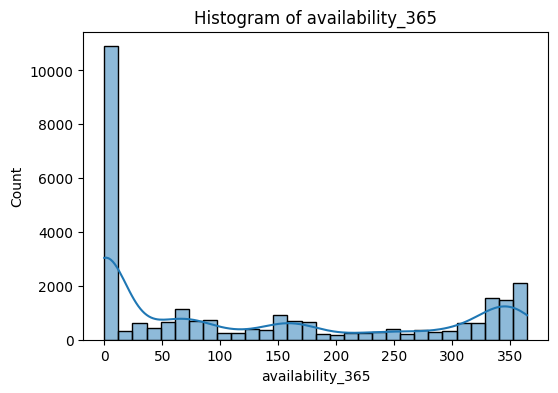

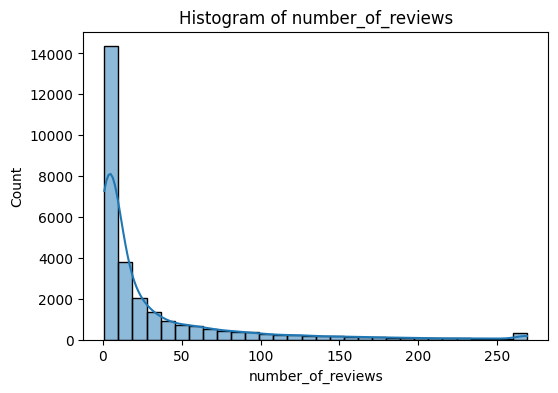

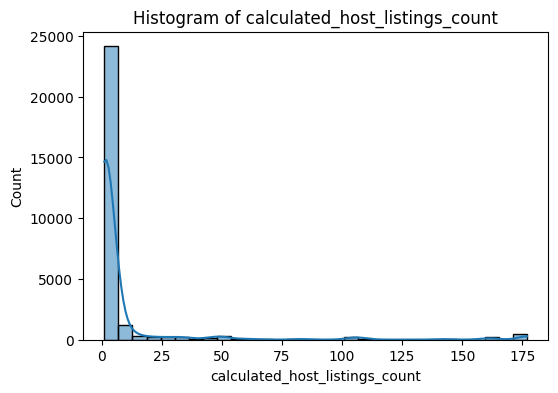

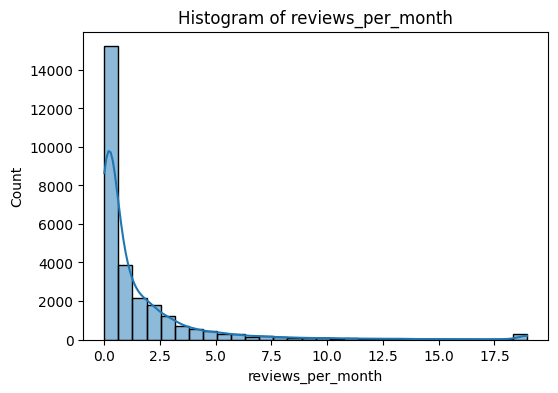

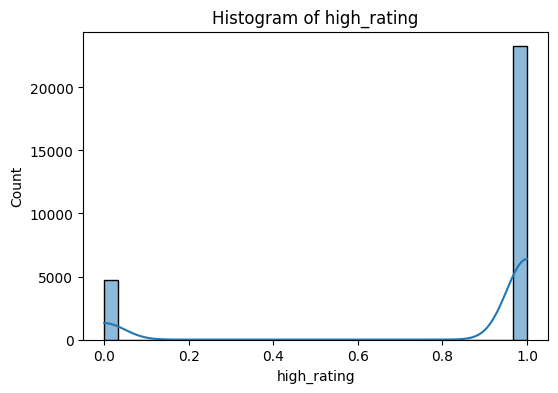

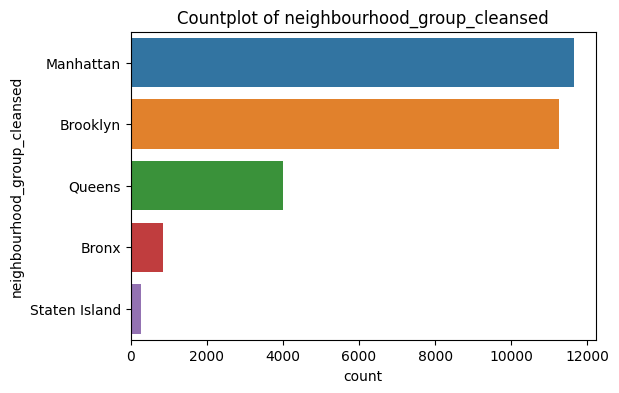

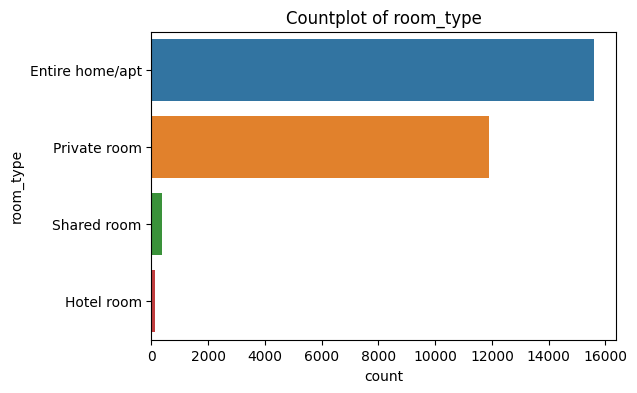

In [12]:
# numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

In [13]:
1. After exploring the data in Part 3, I decided to update my feature list into the following: price, availability_365, host_is_superhost, host_response_rate, host_acceptance_rate, reviews_per_month, number_of_reviews, calculated_host_listings_count, instant_bookable, room_type, bathrooms, neighbourhood_group_cleansed. I decided to add some more features such as 'instant_bookable' and 'room_type' because they provide additional information that could influence whether a listing receives a high rating.

2. To prepare the data for modeling, I handled missing values by imputing means for numeric features like host_response_rate and host_acceptance_rate. For categorical variables, I will apply one‑hot encoding to convert them into numeric format suitable for machine learning algorithms. I also monitored for outliers and applied winsorization to adjust extreme values that could negatively impact the model. Additionally, since logistic regression is sensitive to feature scales, I will scale the numeric features after doing one hot encoding to improve model performance.

3. Since this is a binary classification problem (predicting whether a listing has a high rating), I chose logistic regression as my model. It is interpretable, performs well on tabular data, and serves as a strong baseline for this task. 

5. I plan to use cross‑validation on the training set to get a more reliable estimate of model performance and reduce overfitting to a single split. After that, I will fit the model on the full training set and evaluate it on the test set. For evaluation, I will focus on accuracy, precision, and recall to measure overall performance and ensure that the model correctly identifies high‑rating listings. To further improve the model, I will tune hyperparameters such as the regularization strength (C) using grid search and revisit my feature selection if needed.

    

SyntaxError: invalid syntax (932772556.py, line 1)

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [15]:
#prepare the data with one hot encoding
to_encode = df.select_dtypes(include='object').columns.tolist()
df[to_encode].nunique()

enc = OneHotEncoder(sparse_output =False)
df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]))

df_enc.columns = enc.get_feature_names_out(to_encode)
df = df.drop(columns=to_encode)
df = pd.concat([df, df_enc], axis=1)

In [16]:
df.columns #check resulting column names

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'bathrooms', 'price', 'availability_365', 'number_of_reviews',
       'instant_bookable', 'calculated_host_listings_count',
       'reviews_per_month', 'high_rating',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [17]:
#split data
X = df.drop(columns=['high_rating'])
y = df['high_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 1234)

In [19]:
#scale numeric features (for logistic regression)

# get numeric columns after encoding
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [20]:
# make model
log_model = LogisticRegression(max_iter=1000)

# hyperparameter tuning with GridSearchCV on training set
param_grid = {'C': [0.05, 0.1, 0.2, 0.5, 1]}


grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best C:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# use best model to predict on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("\nFinal Test Performance with Tuned C:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

Best C: {'C': 0.5}
Best CV accuracy: 0.8305888350751977

Final Test Performance with Tuned C:
Accuracy: 0.8288331152610919
Precision: 0.8290241868223519
Recall: 0.9994254524561907
